### Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dash import Dash, dcc, Input, Output, html
import plotly.express as px
import seaborn as sns

### Loading the CSV files

In [2]:
games = pd.read_csv('games.csv')
ranking  = pd.read_csv('ranking.csv')
games_details = pd.read_csv('games_details.csv')
players = pd.read_csv('players.csv')
teams  = pd.read_csv('teams.csv')

/tmp/ipykernel_24460/3636644790.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv('games_details.csv')


In [3]:
games

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0        2022-12-22  22200477            Final    1610612740       1610612759   
1        2022-12-22  22200478            Final    1610612762       1610612764   
2        2022-12-21  22200466            Final    1610612739       1610612749   
3        2022-12-21  22200467            Final    1610612755       1610612765   
4        2022-12-21  22200468            Final    1610612737       1610612741   
...             ...       ...              ...           ...              ...   
26646    2014-10-06  11400007            Final    1610612737       1610612740   
26647    2014-10-06  11400004            Final    1610612741       1610612764   
26648    2014-10-06  11400005            Final    1610612747       1610612743   
26649    2014-10-05  11400002            Final    1610612761       1610612758   
26650    2014-10-04  11400001            Final    1610612748       1610612740   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
0        2022    1610612740     126.0        0.484        0.926  ...   
1        2022    1610612762     120.0        0.488        0.952  ...   
2        2022    1610612739     114.0        0.482        0.786  ...   
3        2022    1610612755     113.0        0.441        0.909  ...   
4        2022    1610612737     108.0        0.429        1.000  ...   
...       ...           ...       ...          ...          ...  ...   
26646    2014    1610612737      93.0        0.419        0.821  ...   
26647    2014    1610612741      81.0        0.338        0.719  ...   
26648    2014    1610612747      98.0        0.448        0.682  ...   
26649    2014    1610612761      99.0        0.440        0.771  ...   
26650    2014    1610612748      86.0        0.431        0.679  ...   

       AST_home  REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
0          25.0      46.0    1610612759     117.0        0.478        0.815   
1          16.0      40.0    1610612764     112.0        0.561        0.765   
2          22.0      37.0    1610612749     106.0        0.470        0.682   
3          27.0      49.0    1610612765      93.0        0.392        0.735   
4          22.0      47.0    1610612741     110.0        0.500        0.773   
...         ...       ...           ...       ...          ...          ...   
26646      24.0      50.0    1610612740      87.0        0.366        0.643   
26647      18.0      40.0    1610612764      85.0        0.411        0.636   
26648      29.0      45.0    1610612743      95.0        0.387        0.659   
26649      21.0      30.0    1610612758      94.0        0.469        0.725   
26650      18.0      42.0    1610612740      98.0        0.462        0.706   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  
0             0.321      23.0      44.0               1  
1             0.333      20.0      37.0               1  
2             0.433      20.0      46.0               1  
3             0.261      15.0      46.0               1  
4             0.292      20.0      47.0               0  
...             ...       ...       ...             ...  
26646         0.375      17.0      43.0               1  
26647         0.267      17.0      47.0               0  
26648         0.500      19.0      43.0               1  
26649         0.385      18.0      45.0               1  
26650         0.438      19.0      42.0               0  

[26651 rows x 21 columns]

In [4]:
ranking

TEAM_ID  LEAGUE_ID  SEASON_ID STANDINGSDATE CONFERENCE  \
0       1610612743          0      22022    2022-12-22       West   
1       1610612763          0      22022    2022-12-22       West   
2       1610612740          0      22022    2022-12-22       West   
3       1610612756          0      22022    2022-12-22       West   
4       1610612746          0      22022    2022-12-22       West   
...            ...        ...        ...           ...        ...   
210337  1610612765          0      22013    2014-09-01       East   
210338  1610612738          0      22013    2014-09-01       East   
210339  1610612753          0      22013    2014-09-01       East   
210340  1610612755          0      22013    2014-09-01       East   
210341  1610612749          0      22013    2014-09-01       East   

                TEAM   G   W   L  W_PCT HOME_RECORD ROAD_RECORD  RETURNTOPLAY  
0             Denver  30  19  11  0.633        10-3         9-8           NaN  
1            Memphis  30  19  11  0.633        13-2         6-9           NaN  
2        New Orleans  31  19  12  0.613        13-4         6-8           NaN  
3            Phoenix  32  19  13  0.594        14-4         5-9           NaN  
4        LA Clippers  33  19  14  0.576        11-7         8-7           NaN  
...              ...  ..  ..  ..    ...         ...         ...           ...  
210337       Detroit  82  29  53  0.354       17-24       12-29           NaN  
210338        Boston  82  25  57  0.305       16-25        9-32           NaN  
210339       Orlando  82  23  59  0.280       19-22        4-37           NaN  
210340  Philadelphia  82  19  63  0.232       10-31        9-32           NaN  
210341     Milwaukee  82  15  67  0.183       10-31        5-36           NaN  

[210342 rows x 13 columns]

### Dependence on Conference

In [154]:
ranking.groupby('CONFERENCE')['W'].agg(['mean', 'count'])

mean   count
CONFERENCE                   
East        27.057233  105358
West        29.614027  104984

### There is difference between East and West due to following reasons - 
#### Market Appeal: Cities like Los Angeles, Phoenix, and Dallas offer attractive lifestyles, media attention, and lower taxes, making them magnets for top players
#### Talent Acquisition & Management: West teams embraced international players earlier (Dirk, Tony Parker, Manu Ginobili) and often made shrewder draft/trade decisions (Lakers/Spurs lucking into MVPs).
#### Coaching & Star Power: Elite coaches (Popovich, Phil Jackson, Carlisle) thrived in the West, and major markets (LA, Bay Area) consistently lure superstars, attracting more talent and creating a powerful cycle.


In [5]:
games.isna().sum()

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

### Imputing missing PTS_home values

In [6]:
games['PTS_home']=games['PTS_home'].fillna(games.PTS_home.mode()[0])

In [7]:
ranking.isna().sum()

TEAM_ID               0
LEAGUE_ID             0
SEASON_ID             0
STANDINGSDATE         0
CONFERENCE            0
TEAM                  0
G                     0
W                     0
L                     0
W_PCT                 0
HOME_RECORD           0
ROAD_RECORD           0
RETURNTOPLAY     206352
dtype: int64

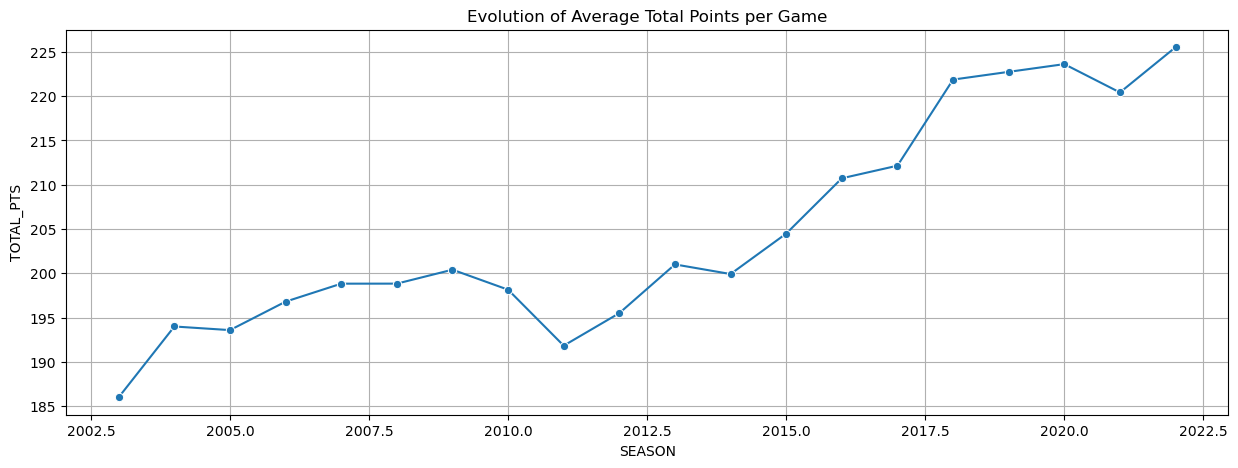

In [9]:

games['TOTAL_PTS'] = games['PTS_home'] + games['PTS_away']

# Group by season
season_trends = games.groupby('SEASON').agg({
    'TOTAL_PTS': 'mean',
    'FG3_PCT_home': 'mean',
    'AST_home': 'mean'
}).reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(data=season_trends, x='SEASON', y='TOTAL_PTS', marker='o')
plt.title('Evolution of Average Total Points per Game')
plt.grid(True)
plt.show()

### Conclusion :  FROM THE EARLY 2000s to 2022, the average total points per game has increased from roughly 190 points to over 225 points. While home teams consistently score slightly more than away teams (maintaining the "home-court advantage"), both metrics have risen in tandem.

/tmp/ipykernel_24460/2136843416.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



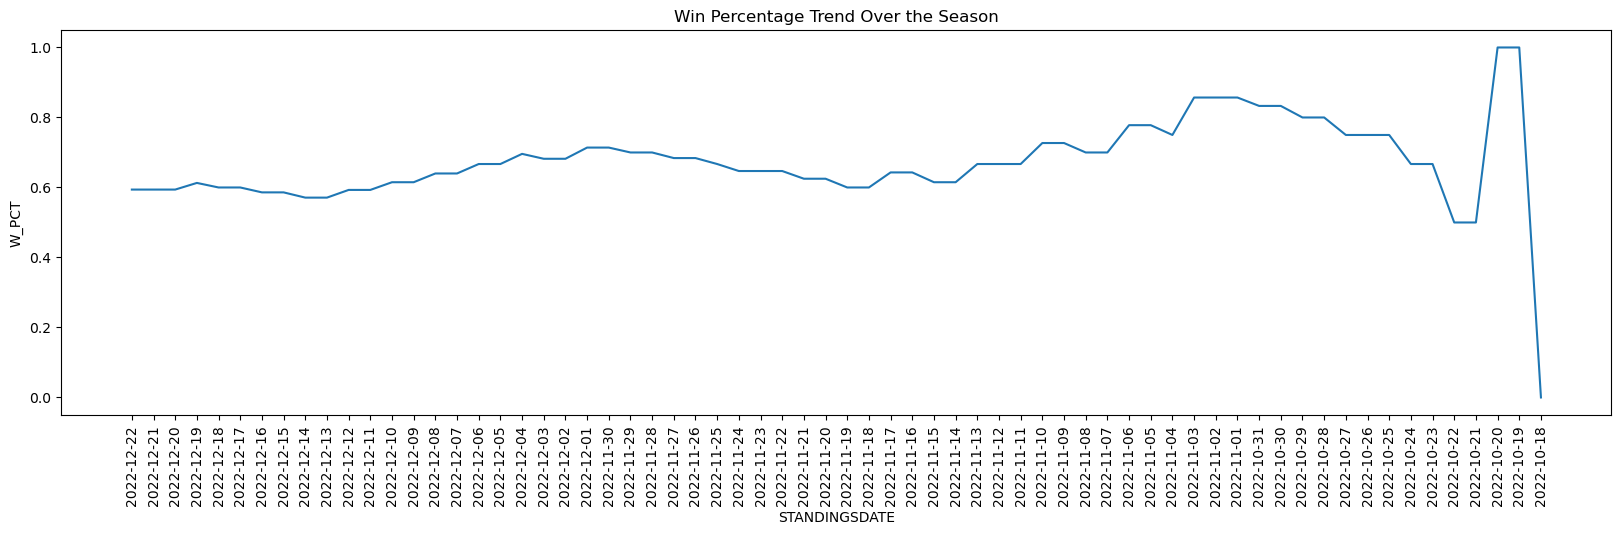

In [74]:
plt.figure(figsize=(20,5))
ranking_teams= ranking[(ranking['TEAM_ID']==1610612756) &(ranking['SEASON_ID']==22022)]
ax = sns.lineplot(ranking_teams, x='STANDINGSDATE', y='W_PCT')
plt.title('Win Percentage Trend Over the Season')
a = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## TEAM 1610612756 saw a massive drop in win percentage on 18th October 2022

In [12]:
min_year = season_trends.SEASON.min()
max_year = season_trends.SEASON.max()
marks = {int(v):str(int(v)) for v in np.linspace(min_year, max_year, 5)}

In [13]:
games_details

GAME_ID     TEAM_ID TEAM_ABBREVIATION    TEAM_CITY  PLAYER_ID  \
0       22200477  1610612759               SAS  San Antonio    1629641   
1       22200477  1610612759               SAS  San Antonio    1631110   
2       22200477  1610612759               SAS  San Antonio    1627751   
3       22200477  1610612759               SAS  San Antonio    1630170   
4       22200477  1610612759               SAS  San Antonio    1630200   
...          ...         ...               ...          ...        ...   
668623  11200005  1610612743               DEN       Denver     202706   
668624  11200005  1610612743               DEN       Denver     202702   
668625  11200005  1610612743               DEN       Denver     201585   
668626  11200005  1610612743               DEN       Denver     202389   
668627  11200005  1610612743               DEN       Denver     201951   

            PLAYER_NAME NICKNAME START_POSITION COMMENT    MIN  ...  OREB  \
0        Romeo Langford    Romeo              F     NaN  18:06  ...   1.0   
1         Jeremy Sochan   Jeremy              F     NaN  31:01  ...   6.0   
2          Jakob Poeltl    Jakob              C     NaN  21:42  ...   1.0   
3         Devin Vassell    Devin              G     NaN  30:20  ...   0.0   
4             Tre Jones      Tre              G     NaN  27:44  ...   0.0   
...                 ...      ...            ...     ...    ...  ...   ...   
668623  Jordan Hamilton      NaN            NaN     NaN     19  ...   0.0   
668624   Kenneth Faried      NaN            NaN     NaN     23  ...   1.0   
668625     Kosta Koufos      NaN            NaN     NaN     15  ...   3.0   
668626   Timofey Mozgov      NaN            NaN     NaN     19  ...   1.0   
668627        Ty Lawson      NaN            NaN     NaN     27  ...   0.0   

        DREB  REB  AST  STL  BLK   TO   PF   PTS  PLUS_MINUS  
0        1.0  2.0  0.0  1.0  0.0  2.0  5.0   2.0        -2.0  
1        3.0  9.0  6.0  1.0  0.0  2.0  1.0  23.0       -14.0  
2        3.0  4.0  1.0  1.0  0.0  2.0  4.0  13.0        -4.0  
3        9.0  9.0  5.0  3.0  0.0  2.0  1.0  10.0       -18.0  
4        2.0  2.0  3.0  0.0  0.0  2.0  2.0  19.0         0.0  
...      ...  ...  ...  ...  ...  ...  ...   ...         ...  
668623   2.0  2.0  0.0  2.0  0.0  1.0  3.0  17.0         NaN  
668624   0.0  1.0  1.0  1.0  0.0  3.0  3.0  18.0         NaN  
668625   5.0  8.0  0.0  1.0  0.0  0.0  3.0   6.0         NaN  
668626   2.0  3.0  1.0  0.0  0.0  4.0  2.0   2.0         NaN  
668627   2.0  2.0  6.0  2.0  0.0  6.0  1.0   8.0         NaN  

[668628 rows x 29 columns]

In [14]:
games

GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0        2022-12-22  22200477            Final    1610612740       1610612759   
1        2022-12-22  22200478            Final    1610612762       1610612764   
2        2022-12-21  22200466            Final    1610612739       1610612749   
3        2022-12-21  22200467            Final    1610612755       1610612765   
4        2022-12-21  22200468            Final    1610612737       1610612741   
...             ...       ...              ...           ...              ...   
26646    2014-10-06  11400007            Final    1610612737       1610612740   
26647    2014-10-06  11400004            Final    1610612741       1610612764   
26648    2014-10-06  11400005            Final    1610612747       1610612743   
26649    2014-10-05  11400002            Final    1610612761       1610612758   
26650    2014-10-04  11400001            Final    1610612748       1610612740   

       SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  \
0        2022    1610612740     126.0        0.484        0.926  ...   
1        2022    1610612762     120.0        0.488        0.952  ...   
2        2022    1610612739     114.0        0.482        0.786  ...   
3        2022    1610612755     113.0        0.441        0.909  ...   
4        2022    1610612737     108.0        0.429        1.000  ...   
...       ...           ...       ...          ...          ...  ...   
26646    2014    1610612737      93.0        0.419        0.821  ...   
26647    2014    1610612741      81.0        0.338        0.719  ...   
26648    2014    1610612747      98.0        0.448        0.682  ...   
26649    2014    1610612761      99.0        0.440        0.771  ...   
26650    2014    1610612748      86.0        0.431        0.679  ...   

       REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  \
0          46.0    1610612759     117.0        0.478        0.815   
1          40.0    1610612764     112.0        0.561        0.765   
2          37.0    1610612749     106.0        0.470        0.682   
3          49.0    1610612765      93.0        0.392        0.735   
4          47.0    1610612741     110.0        0.500        0.773   
...         ...           ...       ...          ...          ...   
26646      50.0    1610612740      87.0        0.366        0.643   
26647      40.0    1610612764      85.0        0.411        0.636   
26648      45.0    1610612743      95.0        0.387        0.659   
26649      30.0    1610612758      94.0        0.469        0.725   
26650      42.0    1610612740      98.0        0.462        0.706   

       FG3_PCT_away  AST_away  REB_away  HOME_TEAM_WINS  TOTAL_PTS  
0             0.321      23.0      44.0               1      243.0  
1             0.333      20.0      37.0               1      232.0  
2             0.433      20.0      46.0               1      220.0  
3             0.261      15.0      46.0               1      206.0  
4             0.292      20.0      47.0               0      218.0  
...             ...       ...       ...             ...        ...  
26646         0.375      17.0      43.0               1      180.0  
26647         0.267      17.0      47.0               0      166.0  
26648         0.500      19.0      43.0               1      193.0  
26649         0.385      18.0      45.0               1      193.0  
26650         0.438      19.0      42.0               0      184.0  

[26651 rows x 22 columns]

In [15]:
player_stats = games_details.groupby('PLAYER_NAME')['PTS'].agg(['mean', 'std', 'count'])

# Filter for players with significant game time (e.g., more than 50 games)
top_performers = player_stats[player_stats['count']>50].sort_values('mean', ascending=False).head(10)

print("Top 10 Scorers (Avg Points):")
print(top_performers)

Top 10 Scorers (Avg Points):
                      mean        std  count
PLAYER_NAME                                 
Kevin Durant     27.074539   8.008606   1194
Luka Doncic      26.941003   8.499708    339
LeBron James     26.834292   8.198610   1738
Kobe Bryant      26.621463  10.208717   1025
Allen Iverson    25.863341   9.735010    461
Joel Embiid      25.607229   9.307025    415
Zion Williamson  25.049587   6.911164    121
Trae Young       25.039548   9.922568    354
Damian Lillard   24.353081   9.153157    844
Stephen Curry    24.318267   9.881314   1062


## Kevin Durant has highest score 

In [16]:
player_performance = pd.merge(left=games_details[['PLAYER_NAME', 'GAME_ID']], right=games[['GAME_ID', 'TOTAL_PTS', 'GAME_DATE_EST']], how='inner', on='GAME_ID').reset_index()
player_performance

index      PLAYER_NAME   GAME_ID  TOTAL_PTS GAME_DATE_EST
0            0   Romeo Langford  22200477      243.0    2022-12-22
1            1    Jeremy Sochan  22200477      243.0    2022-12-22
2            2     Jakob Poeltl  22200477      243.0    2022-12-22
3            3    Devin Vassell  22200477      243.0    2022-12-22
4            4        Tre Jones  22200477      243.0    2022-12-22
...        ...              ...       ...        ...           ...
669555  669555  Jordan Hamilton  11200005      210.0    2012-10-06
669556  669556   Kenneth Faried  11200005      210.0    2012-10-06
669557  669557     Kosta Koufos  11200005      210.0    2012-10-06
669558  669558   Timofey Mozgov  11200005      210.0    2012-10-06
669559  669559        Ty Lawson  11200005      210.0    2012-10-06

[669560 rows x 5 columns]

Text(0, 0.5, 'Counts')

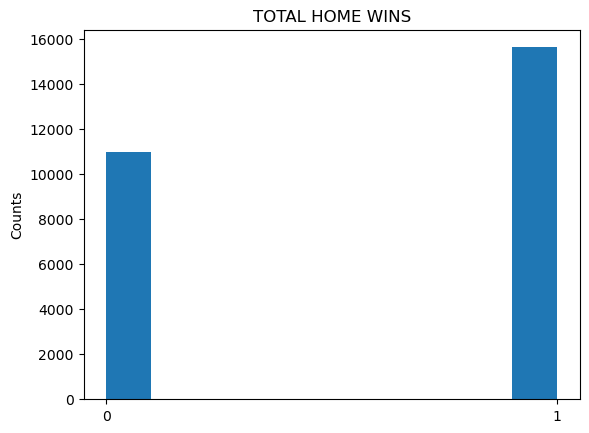

In [91]:
plt.hist(games['HOME_TEAM_WINS'])
a = plt.xticks([0,1])
plt.title('TOTAL HOME WINS')
plt.ylabel('Counts')

### Conclusion : Home wins significantly more due to factors affecting practice, habitual to environment, less fatigue in travel, less stress

# Creating Interactive Dashboard with Plotly

In [146]:
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}
app = Dash()
app.layout = html.Div([
    html.H1("This is the NBA Dashboard", style={'textAlign': 'center', 'color': '#D8DB10'}),
    html.Br(),
    html.H2("Ranking according to team and season", style={'color':'#D8DB10', 'font-size':30, 'textAlign':'center'}),
    dcc.Dropdown(id='team_selection', value=1610612762,options=ranking.TEAM_ID.unique(), style={'background-color': "#AC8403"},placeholder="Enter TEAM ID"),
    dcc.Dropdown(id='season_selection',value=22022, options=ranking.SEASON_ID.unique(), style={'background-color': "#AC8403"}, placeholder="Enter SEASON ID"),
    dcc.Graph(id='ranking_graph'),
    html.H2("Total points scored per season", style={'textAlign': 'center', 'color': '#D8DB10', 'font-size': 30}),
    dcc.Slider(id='games_year_slider', min=min_year, max=max_year,step=2,value=2010, marks=marks),
    dcc.Graph(id='games_year_graph'),
    
    html.H2("Performance of player", style={'textAlign': 'center', 'color': "#D8DB10", 'font-size': 30}),
    dcc.Dropdown(id='player_options',value='Tre Jones', style={'background-color': "#AC8403"},options=player_performance.PLAYER_NAME.unique(),placeholder='Choose Player'),
    dcc.Graph(id='player_graph'),

], style={'background-color':"#15232E"})


In [147]:
@app.callback(Output(component_id='ranking_graph', component_property='figure'),
              Input(component_id='team_selection', component_property='value'),
               Input(component_id='season_selection', component_property='value'))
def getit(e, i):
    """Filter the ranking dataframe for specific team_id and season_id and return the fig object
    """
    
    ranking_teams= ranking[(ranking['TEAM_ID']==e) &(ranking['SEASON_ID']==i)]
    fig = px.line(ranking_teams, x='STANDINGSDATE', y='W_PCT')
    fig.update_layout(plot_bgcolor=colors['background'], paper_bgcolor=colors['background'], font_color=colors['text'])

    return fig


@app.callback(Output(component_id='games_year_graph', component_property='figure'),
              Input(component_id='games_year_slider', component_property='value'))
def games_slider(entered):
    """Filter the season_trends according to entered season and return fig object"""
    
    entered = int(entered)

    fig = px.line(season_trends[season_trends['SEASON']<=entered], x='SEASON', y='TOTAL_PTS')
    fig.update_layout(plot_bgcolor=colors['background'], paper_bgcolor=colors['background'], font_color=colors['text'])
    return fig


@app.callback(Output(component_id='player_graph', component_property='figure'),
              Input(component_id='player_options', component_property='value'))
def player_graph(entered):
    """Check if entered is present in players performance then return fig object
    """
    

    temp = player_performance[player_performance['PLAYER_NAME'] == entered]
    fig = px.line(temp, x='GAME_DATE_EST', y='TOTAL_PTS')
    fig.update_layout(plot_bgcolor=colors['background'], paper_bgcolor=colors['background'], font_color=colors['text'])
    return fig


    
# Running the app 
if __name__=='__main__':
    app.run(jupyter_mode='external')

Dash app running on http://127.0.0.1:8050/
